In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
du_table = {
    # HVS candidates from Du et al. 99% probability of being unbound.
    # Tuples are d (kpc), r_gc (kpc), v_gc (km/s).
    6698855754225352192: (2.11, 6.44, 717),
    3593446274383096448: (3.26, 8.77, 734),
    4119670443586493184: (0.28, 7.93, 670),
    1842456376310935552: (1.09, 7.87, 824),
    4396109004117478656: (0.47, 7.81, 728),
    4912074832815572224: (0.63, 8.14, 756),
    4119759641435130624: (0.24, 7.96, 663),
    4065092915465740160: (0.17, 8.03, 621),
    2946665465655257472: (3.26, 10.65, 810),
    4467323685050696960: (5.58, 6.39, 819),
    3841458366321558656: (2.63, 9.77, 840),
    2655054950237153664: (1.55, 8.07, 621),
    4062943374550066560: (0.11, 8.09, 589),
    4121504428896960640: (0.12, 8.08, 648),
    2047267531138612864: (1.5, 7.78, 748),
    4050754184394584192: (0.28, 7.92, 656),
    2525871954701579904: (0.59, 8.34, 636),
    3685380427311132160: (1.36, 7.91, 761),
    4050705707044344832: (0.24, 7.96, 685),
    4052470217026086144: (0.2, 8.0, 772),
    4055741088022263680: (6.69, 7.51, 751),
    4057367235624058240: (0.2, 8.0, 711),
    4062949009547937152: (0.49, 7.71, 708),
    4063041295654767488: (0.29, 7.91, 1142),
    4063270135632421888: (0.24, 7.96, 751),
    4068950625022563584: (0.06, 8.14, 611),
    1820931585123817728: (1.8, 7.3, 1319),
    6097052289696317952: (5.1, 6.0, 1407),
}

du_ids = [str(id) for id in du_table.keys()]

In [3]:
data = pd.read_pickle('du_data.pickle')

In [4]:
# Augment the data with distances from solar system, galactic center distances, and velocities.

data['d_corrected'] = 0
data['gc_radius_corrected'] = 0
data['gc_velocity_corrected'] = 0

for source_id in du_table:
    data.loc[data.source_id == source_id, 'd_corrected'] = du_table[source_id][0]
    data.loc[data.source_id == source_id, 'gc_radius_corrected'] = du_table[source_id][1]
    data.loc[data.source_id == source_id, 'gc_velocity_corrected'] = du_table[source_id][2]

In [5]:
data.columns

Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator_object_type',

In [6]:
data['d_corrected']

0     1.80
1     1.09
2     1.50
3     0.59
4     1.55
5     3.26
6     3.26
7     1.36
8     2.63
9     0.24
10    0.28
11    0.20
12    6.69
13    0.20
14    0.11
15    0.49
16    0.29
17    0.24
18    0.17
19    0.06
20    0.28
21    0.24
22    0.12
23    0.47
24    5.58
25    0.63
26    5.10
27    2.11
Name: d_corrected, dtype: float64

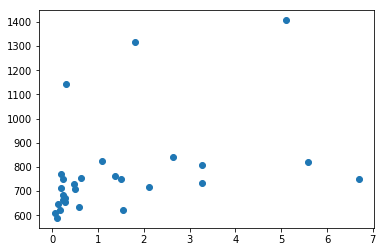

In [7]:
plt.scatter(data['d_corrected'], data['gc_velocity_corrected'])